## Multiclass Classification using a neural network with Keras
using categorical_crossentropy loss in Keras

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train[0].max()

255

In [5]:
#reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize the value of every pixel into the range of 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


create a validation set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


### Show the digit images

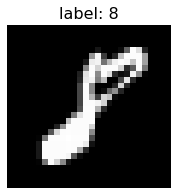

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

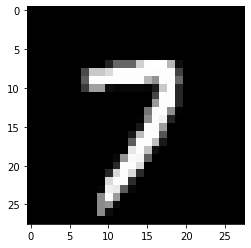

In [8]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [9]:
#the class label of the first training sample
y_train[0]

7

In [10]:
# apply one-hot encoding to the training, validation, and test sets
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
# to use categorical_crossentropy loss in Keras
# we convert every class label into a one-hot vector of 10 elements (there are 10 classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Define the MLP model

In [12]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

### Train the model

In [14]:
for epoch in range(0, 10):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file 
    model.save('NN_multiclass_classification_Keras_CE_e'+str(epoch)+'.h5')

epoch 0
844/844 [==============================] - 7s 8ms/step - loss: 0.3671 - accuracy: 0.8946 - val_loss: 0.1777 - val_accuracy: 0.9468
epoch 1
844/844 [==============================] - 6s 7ms/step - loss: 0.1553 - accuracy: 0.9542 - val_loss: 0.1178 - val_accuracy: 0.9633
epoch 2
844/844 [==============================] - 7s 8ms/step - loss: 0.1076 - accuracy: 0.9678 - val_loss: 0.0939 - val_accuracy: 0.9708
epoch 3
844/844 [==============================] - 6s 8ms/step - loss: 0.0814 - accuracy: 0.9758 - val_loss: 0.0833 - val_accuracy: 0.9748
epoch 4
844/844 [==============================] - 6s 7ms/step - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0733 - val_accuracy: 0.9763
epoch 5
844/844 [==============================] - 6s 8ms/step - loss: 0.0539 - accuracy: 0.9842 - val_loss: 0.0751 - val_accuracy: 0.9765
epoch 6
844/844 [==============================] - 6s 7ms/step - loss: 0.0437 - accuracy: 0.9871 - val_loss: 0.0741 - val_accuracy: 0.9760
epoch 7
844/844 [==========

### Plot training histroy: loss vs epoch and accuracy vs epoch

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

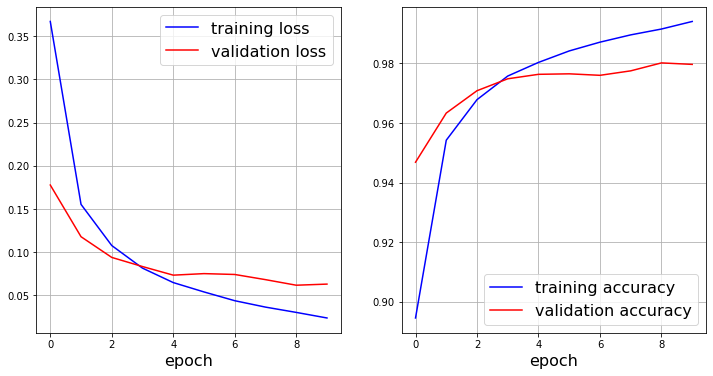

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

after training, we load the best model

In [25]:
np.argmax(acc_val_list)

8

In [26]:
from tensorflow.keras.models import load_model
model = load_model('NN_multiclass_classification_Keras_CE_e8.h5')

### Test the model

In [27]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06642469763755798
Test accuracy: 0.9782999753952026


### Make Prediction on the test set

In [28]:
y_test_pred=model.predict(x_test, batch_size=64)

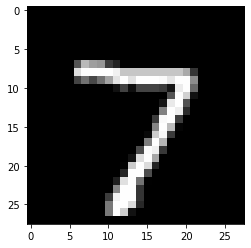

In [29]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [30]:
y_test_pred[0]

array([4.3371969e-07, 7.5003072e-08, 2.0045964e-05, 2.5625219e-05,
       6.6799571e-10, 6.6953859e-08, 3.5145652e-12, 9.9993718e-01,
       4.5443012e-06, 1.2074681e-05], dtype=float32)

In [31]:
np.argmax(y_test_pred[0])

7

In [32]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [33]:
np.argmax(y_test[0])

7